<a href="https://colab.research.google.com/github/GHes31415/Generative-Modeling/blob/main/gauss_mixt_sampl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import torch
import matplotlib.pyplot as plt

In [85]:
# Code for sampling from Gaussian distributions

def sample_gauss_mixture(n_samples: int, n_gaussians: int, mus: torch.tensor, sigs: torch.tensor, weights = torch.tensor):
  '''
  Input:
    n_samples:        number of samples from the guassian mixture
    n_gaussians:      number of gaussians in the gaussian mixture
    mu:               tensor of means, size n_gaussians x d, with d the dimenison of the gaussian mixture with the means of the gaussins
    sig:              tensor of covariance matrices, size n_gaussians x d xd
    weights:          tensor of weight for each gaussian

  Output:
    samples: tensor size n_samples x d
  '''

  dim = mus[0].shape[0]
  samples = torch.zeros((n_samples,dim))
  discrete_dist = torch.distributions.Categorical(probs = weights)
  dist_indices = discrete_dist.sample((n_samples,))
  mus_sampled = mus[dist_indices]
  sigs_sampled = sigs[dist_indices]
  mvn = torch.distributions.MultivariateNormal(loc = mus_sampled, covariance_matrix= sigs_sampled)
  return mvn.sample()

In [95]:
mus = torch.tensor([[1,1],[5,5]], dtype = torch.float32)
sigs = torch.tensor([[[1,0],[0,1]],[[1,0],[0,1]]], dtype = torch.float32)

In [98]:
samples = sample_gauss_mixture(n_samples= 100000, n_gaussians= 2, mus = mus, sigs = sigs, weights= torch.tensor([.5,.5])).numpy()

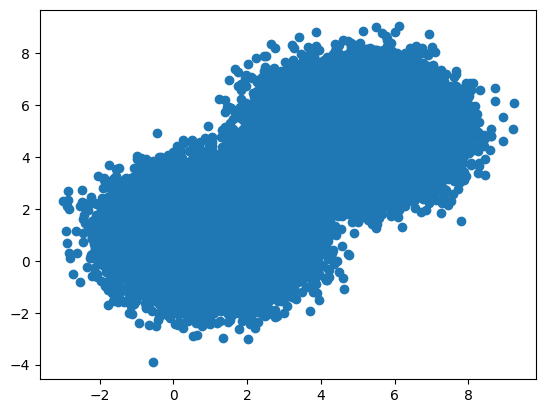

In [99]:
plt.scatter(samples[:,0],samples[:,1])

In [61]:
samples

array([[-0.48764348,  1.7877045 ],
       [ 4.348694  ,  3.8806176 ]], dtype=float32)